# 45 Walmart stores data
- Nijith Kurup A021

In [94]:
### Importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#Importing the data files
train_df = pd.read_csv("C:/Users/NIJITH KURUP/Desktop/Folders/NMIMS files/SML/Assignment ML/train.csv")
test_df = pd.read_csv("C:/Users/NIJITH KURUP/Desktop/Folders/NMIMS files/SML/Assignment ML/test.csv")
store_info = pd.read_csv("C:/Users/NIJITH KURUP/Desktop/Folders/NMIMS files/SML/Assignment ML/stores.csv")
add_inf = pd.read_csv("C:/Users/NIJITH KURUP/Desktop/Folders/NMIMS files/SML/Assignment ML/Additional info.csv")

In [3]:
print("Shape of train data is: ",train_df.shape)
print("Shape of test data is: ",test_df.shape)
print("Shape of store information data is: ",store_info.shape)
print("Shape of additional information data is: ",add_inf.shape)

Shape of train data is:  (421570, 5)
Shape of test data is:  (115064, 4)
Shape of store information data is:  (45, 3)
Shape of additional information data is:  (8190, 12)


In [4]:
train_df.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [5]:
store_info.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [6]:
add_inf.head(10)

,Store,Date,Temperature,Fuel_Price,Clearance1,Clearance2,Clearance3,Clearance4,Clearance5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,3/12/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,3/19/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,3/26/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,4/2/2010,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,4/9/2010,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [13]:
print(train_df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [14]:
print(store_info.columns)

Index(['Store', 'Type', 'Size'], dtype='object')


In [15]:
print(add_inf.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'Clearance1',
       'Clearance2', 'Clearance3', 'Clearance4', 'Clearance5', 'CPI',
       'Unemployment', 'IsHoliday'],
      dtype='object')


# Checking if the data has any missing values

In [7]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
store_info.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [9]:
missdata = add_inf.isnull().sum()/len(add_inf)*100
missdata = missdata.drop(missdata[missdata == 0].index).sort_values(ascending = False)
print(add_inf.isnull().sum(),"\n")

print("Percentage of missing values:")
print(missdata)

Store              0
Date               0
Temperature        0
Fuel_Price         0
Clearance1      4158
Clearance2      5269
Clearance3      4577
Clearance4      4726
Clearance5      4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64 

Percentage of missing values:
Clearance2      64.334554
Clearance4      57.704518
Clearance3      55.885226
Clearance1      50.769231
Clearance5      50.549451
Unemployment     7.142857
CPI              7.142857
dtype: float64


From the above outputs we can see that, there were missing values in only the Additional info data file.

In [10]:
print(train_df.info(),"\n")
print(add_inf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   Clearance1    4032 non-null   float64
 5   Clearance2    2921 non-null   float64
 6   Clearance3    3613 non-null   float64
 7   Clea

In [11]:
# Since pandas is reading Date column as an object data type, we'll first have to change the data type to date-time
train_df["Date"] = pd.to_datetime(train_df["Date"])
add_inf["Date"] = pd.to_datetime(add_inf["Date"])
test_df["Date"] = pd.to_datetime(test_df["Date"])

In [12]:
print(train_df.info(),"\n")
print(add_inf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   Clearance1    4032 non-null   float

# Data preprocessing and Visualization

We saw that over 50% of the data was missing in the clearances columns. But we cannot remove the variables directly because Clearance stock can be a major indicator in predicting the sales especially during the Holiday seasons. So instead, we fill the missing values by 0, indicating there was no clearance stock present.

In [16]:
cols = ['Clearance1','Clearance2', 'Clearance3', 'Clearance4', 'Clearance5']
for i in cols:
    add_inf[i] = add_inf[i].fillna(0)

There were missing values in CPI and Unemployment columns as well. But on close inspection, it was observerd that the values missing, actually corresponded to the test dataset. So the best option was to build a model which predicts CPI and Unemployment rate for each store, and then merge the datasets.

###### Visualising the CPI and Unemployment rate variable, we can learly see that there is an increasing trend in CPI and a decreasing trend in Unemployment rate in all the 45 stores.
###### The graphs are plotted below

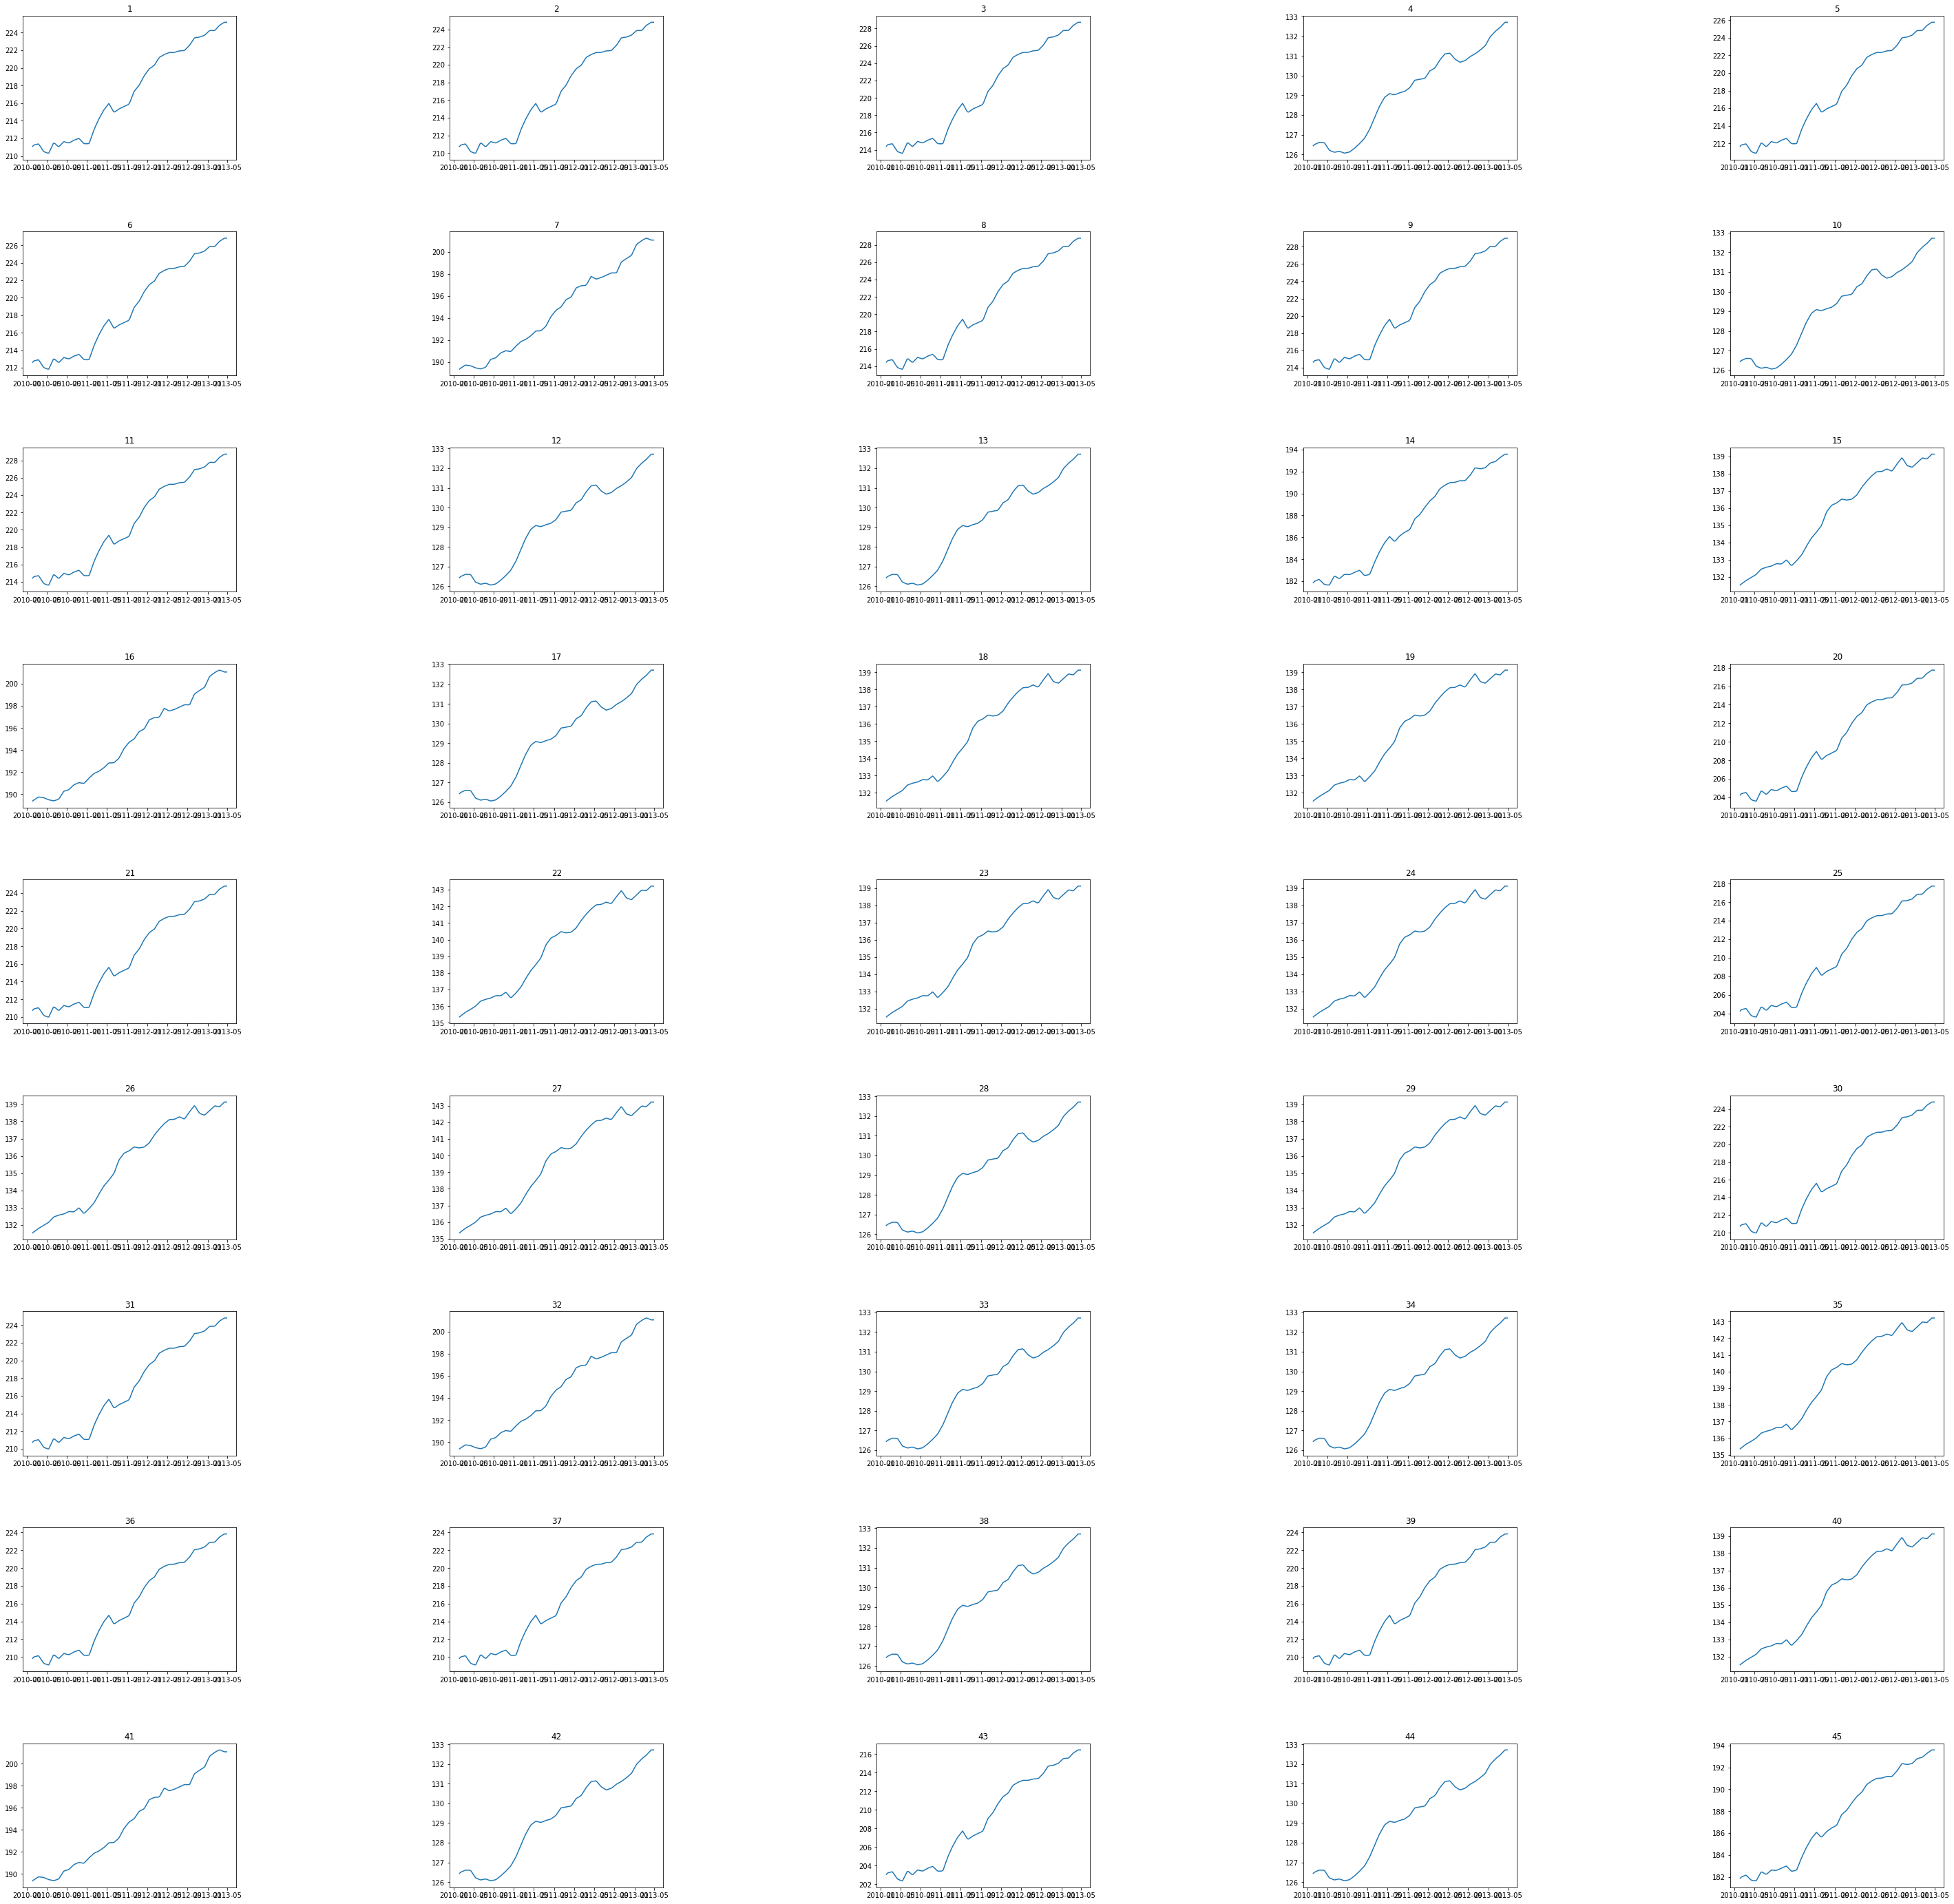

In [17]:
fig, axs = plt.subplots(9,5, figsize=(50,50))
fig.subplots_adjust(hspace = .5, wspace=1)

axs = axs.ravel()

for i in range(1,46):
    sub = add_inf.loc[add_inf["Store"] == i]
    sub = sub.dropna(subset=['Date', 'CPI'])
    plt.subplot(9,5, i)
    plt.plot(sub["Date"],sub["CPI"])
    plt.title(i)
plt.show()

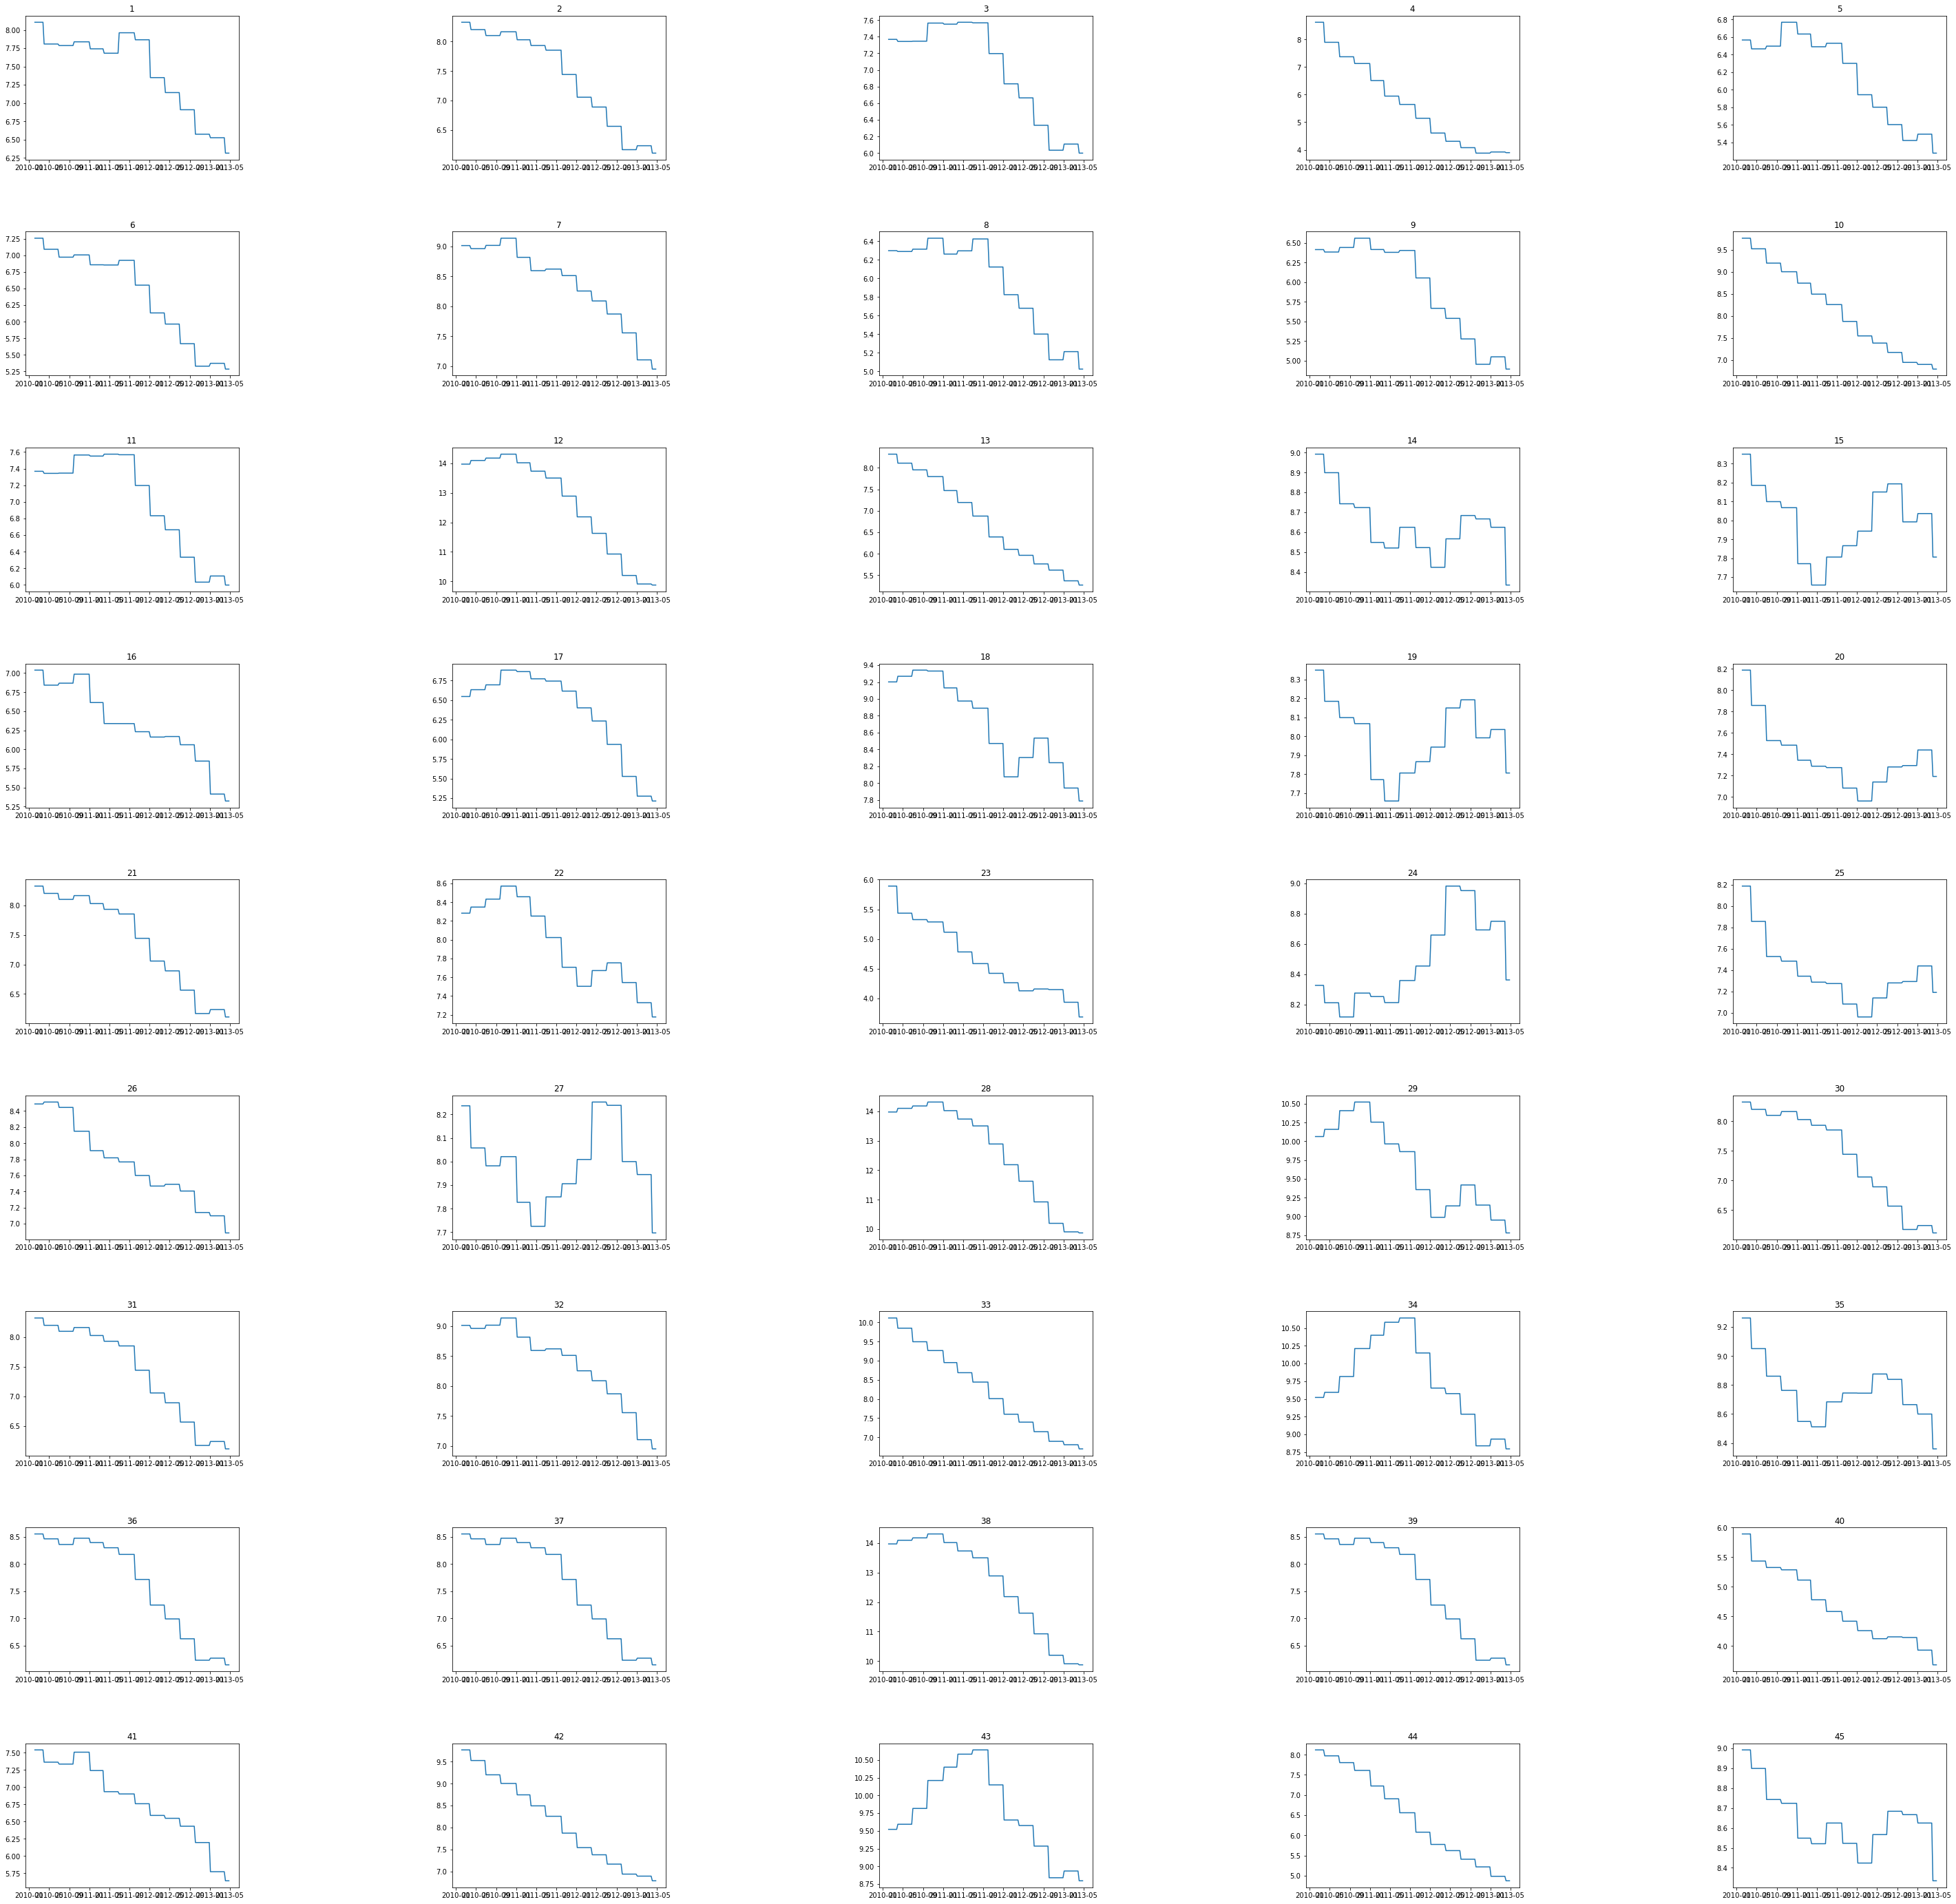

In [18]:
fig, axs = plt.subplots(9,5, figsize=(50,50))
fig.subplots_adjust(hspace = .5, wspace=1)

axs = axs.ravel()

for i in range(1,46):
    sub = add_inf.loc[add_inf["Store"] == i]
    sub = sub.dropna(subset=['Date', 'Unemployment'])
    plt.subplot(9,5, i)
    plt.plot(sub["Date"],sub["Unemployment"])
    plt.title(i)
plt.show()

In [95]:
# Since pandas read Store variable as a numeric variable, we first change the the data type of Store to object and then create
# dummy variables for the stores. The dummy variables should act like a switch while making predictions for each store instead
# of creating 45 models 1 for each store.
add_inf["Store"] = add_inf["Store"].astype("object")
dummies = pd.get_dummies(add_inf["Store"],drop_first=True)
add_inf = pd.concat([add_inf,dummies], axis = 1)
#please ignore the error I accidentally ran the cell.

NameError: name 'add_inf' is not defined

In [20]:
miss_cpi_train = add_inf[add_inf.CPI.notnull()]
miss_cpi_train

,Store,Date,Temperature,Fuel_Price,Clearance1,Clearance2,Clearance3,Clearance4,Clearance5,CPI,...,36,37,38,39,40,41,42,43,44,45
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,...,0,0,0,0,0,0,0,0,0,0
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,...,0,0,0,0,0,0,0,0,0,0
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,...,0,0,0,0,0,0,0,0,0,0
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,...,0,0,0,0,0,0,0,0,0,0
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8172,45,2013-03-29,40.68,3.784,5444.00,0.00,350.84,53.90,1722.11,193.442790,...,0,0,0,0,0,0,0,0,0,1
8173,45,2013-04-05,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,...,0,0,0,0,0,0,0,0,0,1
8174,45,2013-04-12,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,...,0,0,0,0,0,0,0,0,0,1
8175,45,2013-04-19,56.27,3.676,1399.81,39.89,44.38,60.83,1445.05,193.589304,...,0,0,0,0,0,0,0,0,0,1


In [21]:
miss_cpi_test = add_inf[add_inf.CPI.isnull()]
miss_cpi_test

,Store,Date,Temperature,Fuel_Price,Clearance1,Clearance2,Clearance3,Clearance4,Clearance5,CPI,...,36,37,38,39,40,41,42,43,44,45
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,...,0,0,0,0,0,0,0,0,0,0
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,...,0,0,0,0,0,0,0,0,0,0
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,...,0,0,0,0,0,0,0,0,0,0
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,...,0,0,0,0,0,0,0,0,0,0
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,...,0,0,0,0,0,0,0,0,0,1
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,...,0,0,0,0,0,0,0,0,0,1
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,...,0,0,0,0,0,0,0,0,0,1
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,...,0,0,0,0,0,0,0,0,0,1


In [22]:
train_features = miss_cpi_train.drop(['CPI',"Date","Unemployment","Store"], axis = 1)
train_labels = miss_cpi_train['CPI']

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6084, 52) (6084,)
(1521, 52) (1521,)


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [700,750]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 6, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 6 folds for each of 50 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 5],
                                        'n_estimators': [700, 750]},
                   random_state=42, verbose=2)

In [25]:
rf_random.best_params_

{'n_estimators': 750,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_preds = rf_random.predict(X_train)
r2_score(y_train, train_preds)

0.9631649070396445

In [27]:
test_preds = rf_random.predict(X_test)
r2_score(y_test, test_preds)

0.948811054272221

###### Using random forest we got R2 score of 96.31% on training data and 94.88% on  validation data, which implies that the model is not overfitting and performing well. We use the model to predict and fill the missing values.

 We perform similar steps to make predictions for Unemployment variable as well.

In [28]:
test_features = miss_cpi_test.drop(['CPI',"Date","Unemployment","Store"], axis = 1)
miss_cpi_test["CPI"] = rf_random.predict(test_features)
miss_cpi_test["CPI"]

169     198.181211
170     196.958641
171     195.044640
172     190.789081
173     193.593067
           ...    
8185    189.990065
8186    191.354961
8187    191.791608
8188    185.412385
8189    181.802144
Name: CPI, Length: 585, dtype: float64

In [29]:
train_features = miss_cpi_train.drop(["Date","Unemployment","Store"], axis = 1)
train_labels = miss_cpi_train['Unemployment']

X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6084, 53) (6084,)
(1521, 53) (1521,)


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

# Number of trees in random forest
n_estimators = [700,750]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 6, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 6 folds for each of 50 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.4min finished


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [1, 2, 5],
                                        'n_estimators': [700, 750]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 750,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [33]:
train_preds = rf_random.predict(X_train)
r2_score(y_train, train_preds)

0.9966326198788834

In [34]:
test_preds = rf_random.predict(X_test)
r2_score(y_test, test_preds)

0.9855343121038725

###### Using random forest we got R2 score of 99.66% on training data and 98.55% on  validation data, which implies that the model is not overfitting and performing ecxceptionally well. We'll fill the missing values using the model

In [35]:
test_features = miss_cpi_test.drop(["Date","Unemployment","Store"], axis = 1)
miss_cpi_test["Unemployment"] = rf_random.predict(test_features)
miss_cpi_test

,Store,Date,Temperature,Fuel_Price,Clearance1,Clearance2,Clearance3,Clearance4,Clearance5,CPI,...,36,37,38,39,40,41,42,43,44,45
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,198.181211,...,0,0,0,0,0,0,0,0,0,0
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,196.958641,...,0,0,0,0,0,0,0,0,0,0
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,195.044640,...,0,0,0,0,0,0,0,0,0,0
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,190.789081,...,0,0,0,0,0,0,0,0,0,0
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,193.593067,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,189.990065,...,0,0,0,0,0,0,0,0,0,1
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,191.354961,...,0,0,0,0,0,0,0,0,0,1
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,191.791608,...,0,0,0,0,0,0,0,0,0,1
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,185.412385,...,0,0,0,0,0,0,0,0,0,1


In [36]:
print(miss_cpi_train.columns,miss_cpi_test.columns)

Index([       'Store',         'Date',  'Temperature',   'Fuel_Price',
         'Clearance1',   'Clearance2',   'Clearance3',   'Clearance4',
         'Clearance5',          'CPI', 'Unemployment',    'IsHoliday',
                    2,              3,              4,              5,
                    6,              7,              8,              9,
                   10,             11,             12,             13,
                   14,             15,             16,             17,
                   18,             19,             20,             21,
                   22,             23,             24,             25,
                   26,             27,             28,             29,
                   30,             31,             32,             33,
                   34,             35,             36,             37,
                   38,             39,             40,             41,
                   42,             43,             44,             45],
     

In [37]:
trtd_train = miss_cpi_train.drop(list(range(2,46)), axis = 1)
trtd_test = miss_cpi_test.drop(list(range(2,46)), axis = 1)

In [38]:
print(trtd_train.shape,trtd_test.shape)

(7605, 12) (585, 12)


In [39]:
add_info_trtd = pd.concat([trtd_train, trtd_test])
add_info_trtd.sort_values(['Store','Date'], inplace=True)
print(add_inf.shape,add_info_trtd.shape)

(8190, 56) (8190, 12)


# Feature Engineering

#### Since we're not using any of the standard time series models, we cannot use the date variable directly. So instead we store the information of dates using Feature engineering

Since we've information about the major holidays during the specified time span, we use that to create new variables indicating the holiday seasons.

In [40]:
train_df['Super_Bowl'] = (train_df['Date'] == '2010-02-12') | (train_df['Date'] == '2011-02-11')|(train_df['Date'] == '2012-02-10')| (train_df['Date'] == '2013-02-08')
test_df['Super_Bowl'] = (test_df['Date'] == '2010-02-12') | (test_df['Date'] == '2011-02-11')|(test_df['Date'] == '2012-02-10')| (test_df['Date'] == '2013-02-08')

train_df['Super_Bowl'] = train_df['Super_Bowl'].astype(int)
test_df['Super_Bowl'] = test_df['Super_Bowl'].astype(int)

In [41]:
train_df['Labor_Day'] = (train_df['Date'] == '2010-09-10') | (train_df['Date'] == '2011-09-09')|(train_df['Date'] == '2012-09-07')| (train_df['Date'] == '2013-09-06')
test_df['Labor_Day'] = (test_df['Date'] == '2010-09-10') | (test_df['Date'] == '2011-09-09')|(test_df['Date'] == '2012-09-07')| (test_df['Date'] == '2013-09-06')

train_df['Labor_Day'] = train_df['Labor_Day'].astype(int)
test_df['Labor_Day'] = test_df['Labor_Day'].astype(int)

In [42]:
train_df['Thanksgiving'] = (train_df['Date'] == '2010-11-26') | (train_df['Date'] == '2011-11-25')|(train_df['Date'] == '2012-11-23')| (train_df['Date'] == '2013-11-29')
test_df['Thanksgiving'] = (test_df['Date'] == '2010-11-26') | (test_df['Date'] == '2011-11-25')|(test_df['Date'] == '2012-11-23')| (test_df['Date'] == '2013-11-29')

train_df['Thanksgiving'] = train_df['Thanksgiving'].astype(int)
test_df['Thanksgiving'] = test_df['Thanksgiving'].astype(int)

In [43]:
train_df['Christmas'] = (train_df['Date'] == '2010-12-31') | (train_df['Date'] == '2011-12-30')|(train_df['Date'] == '2012-12-28')| (train_df['Date'] == '2013-12-27')
test_df['Christmas'] = (test_df['Date'] == '2010-12-31') | (test_df['Date'] == '2011-12-30')|(test_df['Date'] == '2012-12-28')| (test_df['Date'] == '2013-12-27')
    
train_df['Christmas'] = train_df['Christmas'].astype(int)
test_df['Christmas'] = test_df['Christmas'].astype(int)

In [44]:
print(train_df.shape,test_df.shape)

(421570, 9) (115064, 8)


In [45]:
print(train_df.info(),"\n",test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Super_Bowl    421570 non-null  int32         
 6   Labor_Day     421570 non-null  int32         
 7   Thanksgiving  421570 non-null  int32         
 8   Christmas     421570 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(1), int32(4), int64(2)
memory usage: 19.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 no

#### Since we're done with majority of the data preprocessing steps, the final one is to merge "store info" and "additional info" data with the actual train and test data.

In [46]:
train_df = pd.merge(train_df, store_info, on="Store", how='left')
test_df = pd.merge(test_df, store_info, on="Store", how='left')

print("Shape of the train data is: ", train_df.shape)
print("Shape of the test data is: ", test_df.shape)

Shape of the train data is:  (421570, 11)
Shape of the test data is:  (115064, 10)


In [ ]:
train_df

In [ ]:
test_df

In [47]:
train = pd.merge(train_df, add_info_trtd, on=["Store","Date","IsHoliday"], how='left')
test = pd.merge(test_df, add_info_trtd, on=["Store","Date","IsHoliday"], how='left')

print("Shape of the train data is: ", train.shape)
print("Shape of the test data is: ", test.shape)

Shape of the train data is:  (421570, 20)
Shape of the test data is:  (115064, 19)


In [48]:
print(train.columns,"\n" ,test.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Super_Bowl',
       'Labor_Day', 'Thanksgiving', 'Christmas', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'Clearance1', 'Clearance2', 'Clearance3', 'Clearance4',
       'Clearance5', 'CPI', 'Unemployment'],
      dtype='object') 
 Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Super_Bowl', 'Labor_Day',
       'Thanksgiving', 'Christmas', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'Clearance1', 'Clearance2', 'Clearance3', 'Clearance4',
       'Clearance5', 'CPI', 'Unemployment'],
      dtype='object')


In [49]:
train['IsHoliday'] = train['IsHoliday'].astype(int)
test['IsHoliday'] = test['IsHoliday'].astype(int)

In [50]:
train['Store'] = 'Store ' + train['Store'].astype(str)
test['Store'] = 'Store ' + test['Store'].astype(str)

train['Dept'] = 'Dept ' + train['Dept'].astype(str)
test['Dept'] = 'Dept ' + test['Dept'].astype(str)

In [97]:
cols = ['IsHoliday', 'Super_Bowl', 'Labor_Day','Thanksgiving', 'Christmas']
for i in cols:
    train[i] = train[i].astype("object")
    
for i in cols:
    test[i] = test[i].astype("object")

In [98]:
def levels(df):
    return (pd.DataFrame({'dtype':df.dtypes, 
                         'levels':df.nunique(), 
                         'levels':[df[x].unique() for x in df.columns],
                         'null_values':df.isna().sum(),
                         'unique':df.nunique()}))

In [99]:
levels(train)

,dtype,levels,null_values,unique
Store,object,"[Store 1, Store 2, Store 3, Store 4, Store 5, ...",0,45
Dept,object,"[Dept 1, Dept 2, Dept 3, Dept 4, Dept 5, Dept ...",0,81
Date,object,"[2/5/2010, 2/12/2010, 2/19/2010, 2/26/2010, 3/...",0,143
Weekly_Sales,float64,"[24924.5, 46039.49, 41595.55, 19403.54, 21827....",0,359464
IsHoliday,object,"[0, 1]",0,2
Super_Bowl,object,"[0, 1]",0,2
Labor_Day,object,"[0, 1]",0,2
Thanksgiving,object,"[0, 1]",0,2
Christmas,object,"[0, 1]",0,2
Type,object,"[A, B, C]",0,3


In [100]:
levels(test)

,dtype,levels,null_values,unique
Store,object,"[Store 1, Store 2, Store 3, Store 4, Store 5, ...",0,45
Dept,object,"[Dept 1, Dept 2, Dept 3, Dept 4, Dept 5, Dept ...",0,81
Date,object,"[11/2/2012, 11/9/2012, 11/16/2012, 11/23/2012,...",0,39
IsHoliday,object,"[0, 1]",0,2
Super_Bowl,object,"[0, 1]",0,2
Labor_Day,object,[0],0,1
Thanksgiving,object,"[0, 1]",0,2
Christmas,object,"[0, 1]",0,2
Type,object,"[A, B, C]",0,3
Size,int64,"[151315, 202307, 37392, 205863, 34875, 202505,...",0,40


In [42]:
cols = ['Store', 'Dept','Type']
for i in cols:
    dummies = pd.get_dummies(train[i],drop_first=True)
    train = pd.concat([train,dummies], axis = 1)

for i in cols:
    dummies = pd.get_dummies(test[i],drop_first=True)
    test = pd.concat([test,dummies], axis = 1)

print(train.shape,"\t",test.shape)

(421570, 146) 	 (115064, 145)


In [43]:
cols = ['Store 10','Store 11','Store 12','Store 13','Store 14','Store 15','Store 16',
'Store 17','Store 18','Store 19','Store 2','Store 20','Store 21',
'Store 22','Store 23','Store 24','Store 25','Store 26','Store 27','Store 28','Store 29',
'Store 3','Store 30','Store 31','Store 32','Store 33','Store 34','Store 35','Store 36',
'Store 37','Store 38','Store 39','Store 4','Store 40','Store 41','Store 42','Store 43',
'Store 44','Store 45','Store 5','Store 6','Store 7','Store 8','Store 9','Dept 10',
'Dept 11','Dept 12','Dept 13','Dept 14','Dept 16','Dept 17','Dept 18','Dept 19',
'Dept 2','Dept 20','Dept 21','Dept 22','Dept 23','Dept 24','Dept 25','Dept 26',
'Dept 27','Dept 28','Dept 29','Dept 3','Dept 30','Dept 31','Dept 32','Dept 33',
'Dept 34','Dept 35','Dept 36','Dept 37','Dept 38','Dept 39','Dept 4','Dept 40',
'Dept 41','Dept 42','Dept 43','Dept 44','Dept 45','Dept 46','Dept 47','Dept 48',
'Dept 49','Dept 5','Dept 50','Dept 51','Dept 52','Dept 54','Dept 55','Dept 56',
'Dept 58','Dept 59','Dept 6','Dept 60','Dept 65','Dept 67','Dept 7','Dept 71',
'Dept 72','Dept 74','Dept 77','Dept 78','Dept 79','Dept 8','Dept 80','Dept 81',
'Dept 82','Dept 83','Dept 85','Dept 87','Dept 9','Dept 90','Dept 91','Dept 92',
'Dept 93','Dept 94','Dept 95','Dept 96','Dept 97','Dept 98','Dept 99','B','C']
for i in cols:
    train[i] = train[i].astype("object")

for i in cols:
    test[i] = test[i].astype("object")

# The final step:
#### 1. Removing variables which are not necessary
#### 2. Splitting into train and validation data

###### Note: Since we're not treating this data as a time series data, we're going with the usual way of splitting the data (Randomly chosing observations)

In [48]:
train_features = train.drop(["Store","Dept","Date","Weekly_Sales","Type"], axis = 1)
train_labels = train['Weekly_Sales']

X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

test_features = test.drop(["Store","Dept","Date","Type"], axis = 1)
print(test_features.shape)

(337256, 141) (337256,)
(84314, 141) (84314,)
(115064, 141)


# Base Random Forest model

In [101]:
rf = RandomForestRegressor(random_state=0,verbose=2,n_jobs=-1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.7min finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)

In [102]:
preds_train = rf.predict(X_train)
preds_val = rf.predict(X_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

r2_train = r2_score(y_train, preds_train)
r2_val = r2_score(y_val, preds_val)

print("R2 for training set using base model is: ",r2_train,"\t","R2 on validation set using base model is: ", r2_val)

R2 for training set using base model is:  0.9936343105128356 	 R2 on validation set using base model is:  0.9525558247420431


#### From the above R2 score we can see the the model is slightly over-fitting which can be bad in the long run. So instead we'll tune the model and see if it performs any better.

In [86]:
rf_manually_tuned = RandomForestRegressor(min_samples_split=5,min_samples_leaf=2,random_state=0,n_estimators=80,max_features='sqrt',verbose=2,n_jobs=-1)
rf_manually_tuned.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 80
building tree 2 of 80building tree 3 of 80
building tree 4 of 80

building tree 5 of 80
building tree 6 of 80
building tree 7 of 80
building tree 8 of 80
building tree 9 of 80
building tree 10 of 80
building tree 11 of 80
building tree 12 of 80
building tree 13 of 80
building tree 14 of 80
building tree 15 of 80
building tree 16 of 80
building tree 17 of 80
building tree 18 of 80
building tree 19 of 80
building tree 20 of 80
building tree 21 of 80
building tree 22 of 80
building tree 23 of 80
building tree 24 of 80
building tree 25 of 80
building tree 26 of 80
building tree 27 of 80
building tree 28 of 80
building tree 29 of 80
building tree 30 of 80
building tree 31 of 80
building tree 32 of 80


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.6s


building tree 33 of 80
building tree 34 of 80
building tree 35 of 80
building tree 36 of 80
building tree 37 of 80
building tree 38 of 80
building tree 39 of 80
building tree 40 of 80
building tree 41 of 80
building tree 42 of 80
building tree 43 of 80
building tree 44 of 80
building tree 45 of 80
building tree 46 of 80
building tree 47 of 80
building tree 48 of 80
building tree 49 of 80
building tree 50 of 80
building tree 51 of 80
building tree 52 of 80
building tree 53 of 80
building tree 54 of 80
building tree 55 of 80
building tree 56 of 80
building tree 57 of 80
building tree 58 of 80
building tree 59 of 80
building tree 60 of 80
building tree 61 of 80
building tree 62 of 80
building tree 63 of 80
building tree 64 of 80
building tree 65 of 80
building tree 66 of 80
building tree 67 of 80
building tree 68 of 80
building tree 69 of 80
building tree 70 of 80
building tree 71 of 80
building tree 72 of 80
building tree 73 of 80
building tree 74 of 80
building tree 75 of 80
building tr

[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   54.5s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)

In [87]:
preds_train = rf_manually_tuned.predict(X_train)
preds_val = rf_manually_tuned.predict(X_val)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    3.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    0.8s finished


In [88]:
r2_train = r2_score(y_train, preds_train)
r2_val = r2_score(y_val, preds_val)

mape_train = mape(y_train, preds_train)
mape_val = mape(y_val, preds_val)

print("R2 for training set using base model is: ",r2_train,"\t","R2 on validation set using base model is: ", r2_val)
print("MAPE for training set using base model is: ",mape_train,"\t","MAPE on validation set using base model is: ", mape_val)

R2 for training set is:  0.9581767655757879 	 R2 for validation set is:  0.9376898521979922


In [112]:
print(rf_manually_tuned)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=2, warm_start=False)


#### With some tuning we're able to obtain a model with R2 score of 95.81% on training data and 93.76% on validation data. Which is a bit more robust than the base model and might be useful in the longer run, although performing a bit weakly when compared to the base model.

## Note: Couldn't use GridSearchCV or RandomizedSearchCV to tune the parameters, because it was taking a lot of time.

In [90]:
# Making predictions on the Test data
test["weekly_sales"] = rf_manually_tuned.predict(test_features)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done  80 out of  80 | elapsed:    0.3s finished


# Business Objective

Since we're also predicting the Consumer Price Index which is basically how much a household is ready to pay more money to maintain the same life style. And as we saw in the Visualizations that the CPI was increasing, meaning the households were ready to pay more to maintain the same lifestyle. Which is a good for the business, because people will tend to visit the store more frequetly. And we can stock the goods accordingly which helps in creating a more efficient environment for the business.

# Limitations:
Since Random Forest model was used to predict CPI and Unemployment, it wouldn't be as accurate as our traditional Time Series models. Using traditional time series models might give much more accurate results.

# =====================THE END=====================